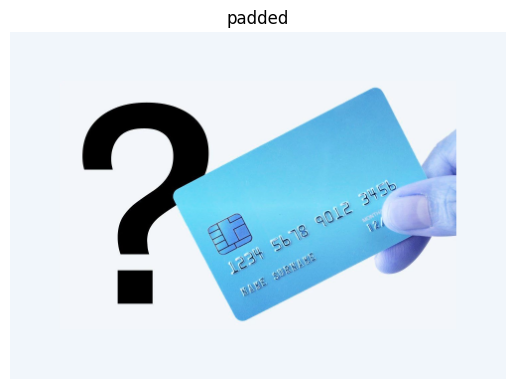

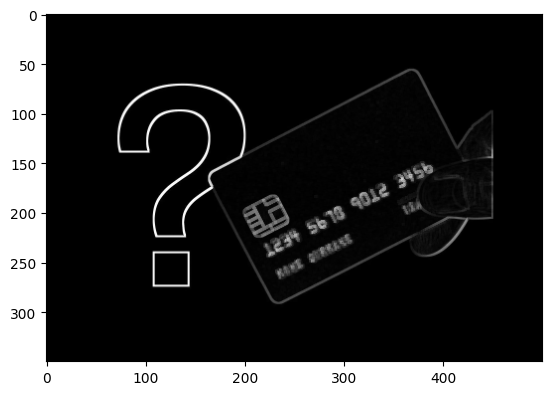

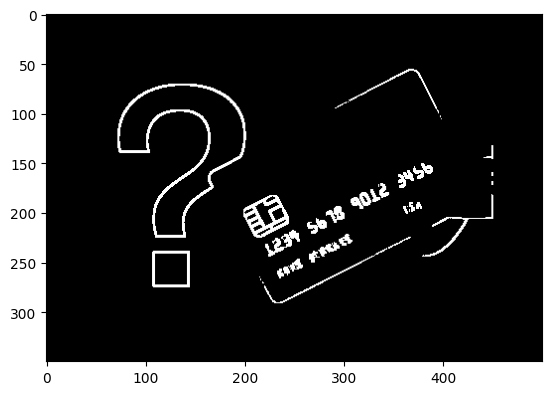

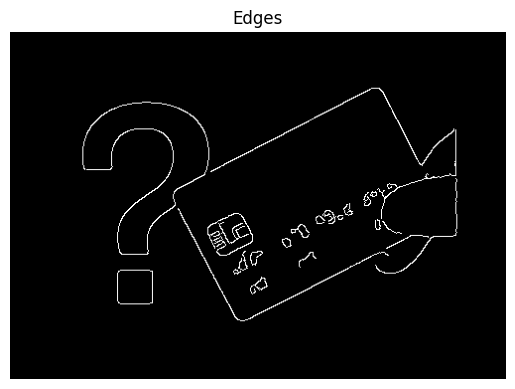

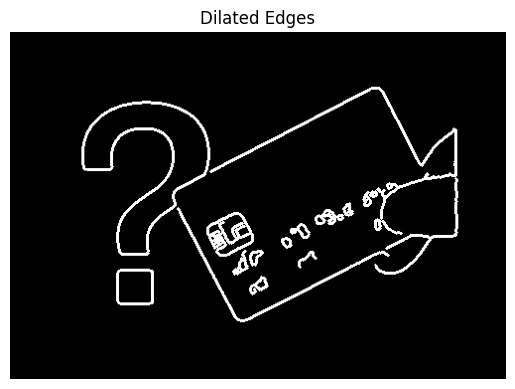

In [2970]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import math
# Load the image
def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()
def resize_image(img, target_width):
    # Read the image
    
    if img is None:
        print("Error: Image not found or unable to load.")
        return
    
    # Get the original dimensions
    height, width = img.shape[:2]
    
    # Calculate the new height to maintain the aspect ratio
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent)))
    
    # Resize the image
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Save the resized image
    return new_img

# image = cv2.imread('01 - Straightforward.jpg')
# image = cv2.imread('02 - You can do it.jpg')
# image = cv2.imread('03 - Should be okay.jpg')
# image = cv2.imread('04 - Still ok, I hope.jpg')
# image = cv2.imread('05 - Looks cool, hope it runs cool too.jpg')
# image = cv2.imread('06 - Hatetlewe7 hatlewe7.jpg')
image = cv2.imread('08 - Ew3a soba3ak ya3am.jpg')
# image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg')
# image = cv2.imread('10 - Mal7 w Felfel.jpg')
# image = cv2.imread('11 - Ya setty ew3i.jpg')
# image = cv2.imread('12 - weewooweewoo.jpg')
# image = cv2.imread('13 - Matozbot el camera ya Kimo.jpg')
# image = cv2.imread('14 - 2el noor 2ata3.jpg')
# image = cv2.imread('15 - Compresso Espresso.jpg')
# image = cv2.imread('16 - Sheel el kart yastaaaa.jpg')
# image = cv2.imread('07 - Hatet3eweg hat3eweg.jpg')


image=resize_image(image,400)
# Get the color of the top-left pixel
# Get the color of the top-left pixel and convert it to a tuple
# Get the color of the top-left pixel
top_left_pixel = image[0, 0]

# Convert to a tuple of integers
top_left_pixel = tuple(map(int, top_left_pixel))

# Define the padding size
pad_size = 50  # You can change this to the desired padding size

# Pad the image with the top-left pixel color
padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)
showImage("padded",padded_image)

gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)

kernel_size = (3,3)  # Width and height of the rectangle
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Perform dilation
dilated_image = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
plt.imshow(dilated_image, cmap="gray")
plt.show()

thresh2 = cv2.threshold(dilated_image, 60, 170, cv2.THRESH_BINARY)[1]
plt.imshow(thresh2, cmap="gray")
plt.show()

# Preprocess the image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)#9x0

# Apply Canny edge detector
edges = cv2.Canny(blurred, 10, 110)

# Define a rectangular kernel for dilation
kernel_size = (3, 3)  # Adjust the size as needed
rectangular_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)

# Apply dilation with the rectangular kernel
dilated_edges = cv2.dilate(edges, rectangular_kernel, iterations=1)


showImage("Edges", edges, cmap='gray')
# Display the dilated edges
showImage("Dilated Edges", dilated_edges, cmap='gray')



In [2971]:

# Define parameters for Hough Line Transform
rho = 1  # Distance resolution in pixels of the Hough grid
theta = np.pi / 180  # Angular resolution in radians of the Hough grid
threshold = 20  # Minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # Minimum number of pixels making up a line
max_line_gap = 3  # Maximum gap in pixels between connectable line segments
line_image = np.copy(dilated_edges) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

# for line in lines:
#     for x1,y1,x2,y2 in line:
#         cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)

# Function to calculate line length
def line_length(line):
    x1, y1, x2, y2 = line
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calculate lengths of all lines
line_lengths = [(line, line_length(line[0])) for line in lines]

# Sort lines based on their lengths (longest first)
line_lengths.sort(key=lambda x: x[1], reverse=True)

# Select the first 4 lines
top_lines = [line for line, length in line_lengths[:4]]

# Calculate the length of the 4th longest line to compare against
length_threshold = line_lengths[3][1] * 0.5  # Example threshold: 50% of the 4th longest line

# Filter out lines that are significantly shorter than the 4th longest line
filtered_lines = [line for line, length in line_lengths if length >= length_threshold]

# Convert lines to the desired format
formatted_lines = [((line[0][0], line[0][1]), (line[0][2], line[0][3])) for line in filtered_lines]

print(formatted_lines)

# Draw the filtered lines on the blank image
for line in formatted_lines:
    (x1, y1), (x2, y2) = line  # Unpack line correctly
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 1)


[((203, 140), (366, 57)), ((239, 290), (372, 222)), ((169, 178), (228, 289)), ((375, 60), (413, 134)), ((202, 141), (275, 104)), ((235, 291), (299, 259)), ((304, 256), (367, 224)), ((449, 160), (449, 99))]


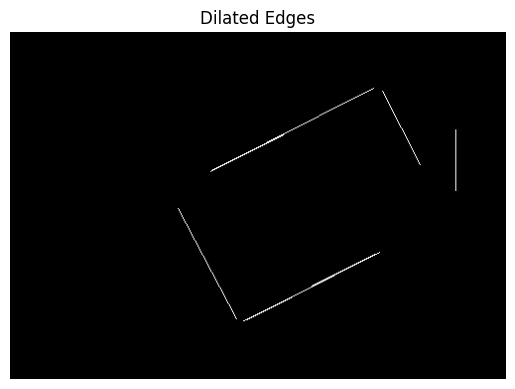

In [2972]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(dilated_edges, 0.8, line_image, 1, 0)
showImage("Dilated Edges", line_image, cmap='gray')


Extended lines: [((477, 0), (0, 243)), ((121, 350), (500, 156)), ((74, 0), (260, 350)), ((344, 0), (500, 303)), ((480, 0), (0, 243)), ((117, 350), (500, 158)), ((118, 350), (500, 156)), ((449, 0), (449, 350))]


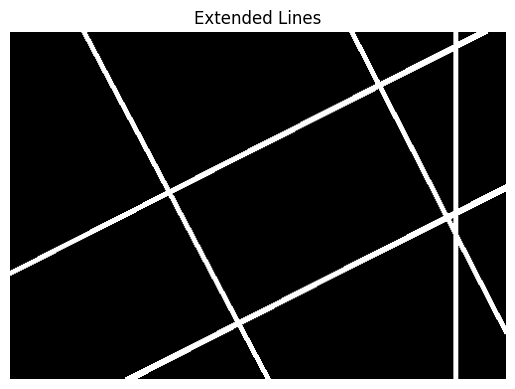

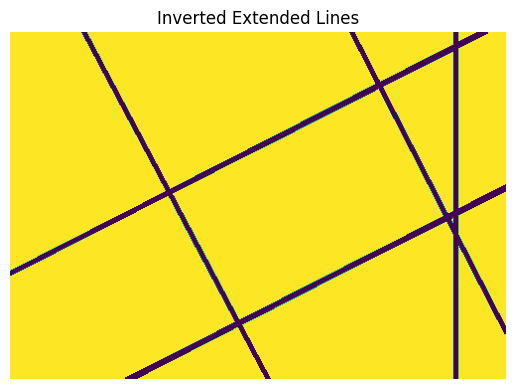

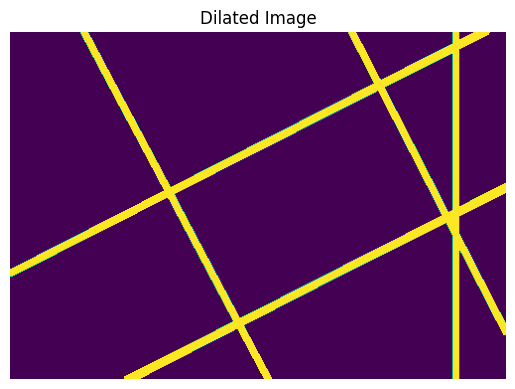

In [2973]:
import cv2
import numpy as np

def extend_line(x1, y1, x2, y2, img_shape):
    """Extend a line segment to the borders of the image."""
    height, width = img_shape[:2]
    dx = x2 - x1
    dy = y2 - y1

    if dx == 0:
        return [(x1, 0), (x1, height)]
    
    slope = dy / dx
    intercept = y1 - slope * x1

    def get_line_endpoints():
        endpoints = []
        x_top = (0 - intercept) / slope
        if 0 <= x_top < width:
            endpoints.append((int(x_top), 0))

        x_bottom = (height - intercept) / slope
        if 0 <= x_bottom < width:
            endpoints.append((int(x_bottom), height))

        y_left = intercept
        if 0 <= y_left < height:
            endpoints.append((0, int(y_left)))

        y_right = slope * width + intercept
        if 0 <= y_right < height:
            endpoints.append((width, int(y_right)))

        return endpoints

    endpoints = get_line_endpoints()
    if len(endpoints) == 2:
        return endpoints
    else:
        return []

# Create a new image for the extended lines
extended_line_image = np.copy(dilated_edges) * 0

# List to store extended lines
extended_lines = []

# Extend each detected line segment to the image borders
for line in formatted_lines:
    (x1, y1), (x2, y2) = line  # Correct unpacking for the format
    extended_points = extend_line(x1, y1, x2, y2, dilated_edges.shape)
    if len(extended_points) == 2:
        (x1_new, y1_new), (x2_new, y2_new) = extended_points
        extended_lines.append(((x1_new, y1_new), (x2_new, y2_new)))
        cv2.line(extended_line_image, (x1_new, y1_new), (x2_new, y2_new), (255, 0, 0), 3)

print("Extended lines:", extended_lines)

# Overlay the extended lines on the original image
lines_edges = cv2.addWeighted(dilated_edges, 0.8, extended_line_image, 1, 0)

# Function to show images (assuming you have it defined)
showImage("Extended Lines", extended_line_image, cmap='gray')

def draw_lines_on_black_image(lines, img_shape, color=(0, 255, 0), thickness=2):
    """Draw lines on a black background image."""
    # Create a black image
    black_image = np.zeros((img_shape[0], img_shape[1], 3), dtype=np.uint8)
    
    # Draw each line on the black image
    for (x1, y1), (x2, y2) in lines:
        cv2.line(black_image, (x1, y1), (x2, y2), color, thickness)
    
    return black_image

# Invert the extended line image
_, extended_line_image_inv = cv2.threshold(extended_line_image, 127, 255, cv2.THRESH_BINARY_INV)
showImage("Inverted Extended Lines", extended_line_image_inv)

kernelbig = np.ones((3, 3), np.uint8)

# Apply dilation (not erosion as your comment suggests)
eroded_image = cv2.dilate(extended_line_image, kernelbig, iterations=1)
showImage("Dilated Image", eroded_image)


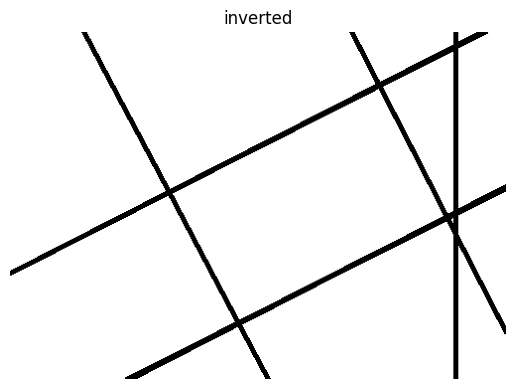

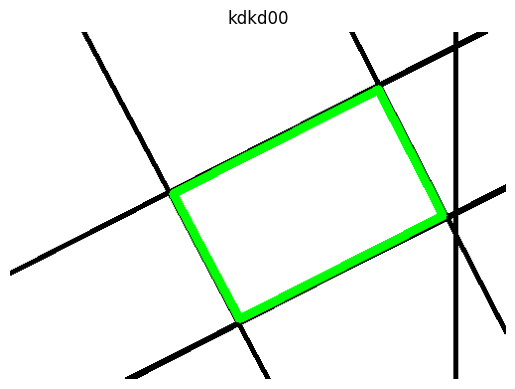

In [2974]:
inverted_image = cv2.bitwise_not(extended_line_image)
showImage("inverted",inverted_image,cmap="gray")

def find_contours(image):
    # Convert the image to color if it's grayscale
    if len(image.shape) == 2 or image.shape[2] == 1:
        image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        image_color = image.copy()

    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by area
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    if len(sorted_contours) > 1:
        # Extract the second largest contour
        second_largest_contour = sorted_contours[0]
        
        # Draw contours on the original image
        image_with_contours = image_color.copy()
        cv2.drawContours(image_with_contours, [second_largest_contour], -1, (0, 255, 0), 7)  # Green color in BGR

        # # Get the bounding rectangle of the second largest contour
        # x, y, w, h = cv2.boundingRect(second_largest_contour)
        # cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle in green
        
        return image_with_contours,second_largest_contour
    else:
        print("Not enough contours found to determine the second largest.")
        return image_color
x,imgc=find_contours(inverted_image)
showImage("kdkd00",x)

In [2975]:
def cut_and_warp(image, contour):
    # Get bounding rectangle for the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Define source points (contour points)
    src_pts = np.float32([pt[0] for pt in contour])
    
    # Define destination points (rectangle coordinates in the output image)
    dst_pts = np.float32([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]])
    
    # Compute the perspective transformation matrix
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    
    # Warp perspective
    warped_image = cv2.warpPerspective(image, M, (w, h))
    
    return warped_image

# Example usage
# Load your image (replace 'your_image.jpg' with your image file)
image = cv2.imread('your_image.jpg')

# Define a contour manually or use a contour extraction function
# Example contour (this should be your actual contour points)
contour = np.array([[[50, 50]], [[200, 50]], [[200, 200]], [[50, 200]]], dtype=np.int32)

# Cut and warp the image
warped_image = cut_and_warp(image, imgc)

# Show results
cv2.imshow('Original Image', image)
cv2.imshow('Warped Image', warped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3547: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'cv::getPerspectiveTransform'
